# Пример чтения файлов формата `.bag`
В данном блокноте приведен пример чтения технических данных из Робота Unitree A1 ИТ-Центра МАИ по имени Дора.
Данный формат широко распространен для записи технических параметров в системах ROS

Установка необходимых пакетов (могут быть проблемы при установке)

In [1]:
# %pip install bagpy

In [2]:
# !git clone https://github.com/jmscslgroup/bagpy
# %cd bagpy
# !git branch specific-commit-branch 979c132
# !git switch specific-commit-branch
# %pip install .

Подключаем необходимые библиотеки:

In [3]:
import bagpy
from bagpy import bagreader
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

plt.style.use(['default'])

In [4]:
b = bagreader("20230117_183740.bag")

[INFO]  Data folder 20230117_183740 already exists. Not creating.


Посмотрим какие данные сохранены в файле

In [5]:
#Если хотим посмотреть все топики в файле
#pd.set_option('display.max_rows', None)
b.topic_table

,Topics,Types,Message Count,Frequency
0,/device_0/info,diagnostic_msgs/KeyValue,13,NaN
1,/device_0/sensor_0/Depth_0/image/data,sensor_msgs/Image,394,14.988542
2,/device_0/sensor_0/Depth_0/image/metadata,diagnostic_msgs/KeyValue,9456,NaN
3,/device_0/sensor_0/Depth_0/info,realsense_msgs/StreamInfo,1,NaN
4,/device_0/sensor_0/Depth_0/info/camera_info,sensor_msgs/CameraInfo,1,NaN
...,...,...,...,...
102,/device_0/sensor_2/option/Frames_Queue_Size/de...,std_msgs/String,1,NaN
103,/device_0/sensor_2/option/Frames_Queue_Size/value,std_msgs/Float32,1,NaN
104,/device_0/sensor_2/option/Global_Time_Enabled/...,std_msgs/String,1,NaN
105,/device_0/sensor_2/option/Global_Time_Enabled/...,std_msgs/Float32,1,NaN


## Декодирование сообщений из топика

In [6]:
msgsImu_MSG = b.message_by_topic('/device_0/sensor_2/Accel_0/imu/data')
msgsImu_MSG

'20230117_183740/device_0-sensor_2-Accel_0-imu-data.csv'

In [7]:
df_msgsImu = pd.read_csv(msgsImu_MSG)
df_msgsImu

,Time,header.seq,header.stamp.secs,header.stamp.nsecs,header.frame_id,orientation.x,orientation.y,orientation.z,orientation.w,orientation_covariance_0,...,linear_acceleration.z,linear_acceleration_covariance_0,linear_acceleration_covariance_1,linear_acceleration_covariance_2,linear_acceleration_covariance_3,linear_acceleration_covariance_4,linear_acceleration_covariance_5,linear_acceleration_covariance_6,linear_acceleration_covariance_7,linear_acceleration_covariance_8
0,0.000383,47404,1673969860,238107681,1,0.0,0.0,0.0,0.0,0.0,...,-0.107873,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.010330,47405,1673969860,247928381,1,0.0,0.0,0.0,0.0,0.0,...,-0.107873,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.020583,47406,1673969860,257749557,1,0.0,0.0,0.0,0.0,0.0,...,-0.098066,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.030097,47407,1673969860,267572165,1,0.0,0.0,0.0,0.0,0.0,...,-0.107873,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.041590,47408,1673969860,277393103,1,0.0,0.0,0.0,0.0,0.0,...,-0.117680,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2586,26.254508,50074,1673969886,483981609,1,0.0,0.0,0.0,0.0,0.0,...,-0.117680,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2587,26.264428,50075,1673969886,493787050,1,0.0,0.0,0.0,0.0,0.0,...,-0.117680,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2588,26.274125,50076,1673969886,503591537,1,0.0,0.0,0.0,0.0,0.0,...,-0.117680,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2589,26.283836,50077,1673969886,513395786,1,0.0,0.0,0.0,0.0,0.0,...,-0.098066,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
df_msgsImu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2591 entries, 0 to 2590
Data columns (total 42 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Time                              2591 non-null   float64
 1   header.seq                        2591 non-null   int64  
 2   header.stamp.secs                 2591 non-null   int64  
 3   header.stamp.nsecs                2591 non-null   int64  
 4   header.frame_id                   2591 non-null   int64  
 5   orientation.x                     2591 non-null   float64
 6   orientation.y                     2591 non-null   float64
 7   orientation.z                     2591 non-null   float64
 8   orientation.w                     2591 non-null   float64
 9   orientation_covariance_0          2591 non-null   float64
 10  orientation_covariance_1          2591 non-null   float64
 11  orientation_covariance_2          2591 non-null   float64
 12  orient

Построим график для линейного ускорения датчика по оси Y.
Обратите внимание, что датчик в процессе эксперимента не перемещался, на него воздействовали лишь вибрации от вентилляторов, расположенных в корпусе робота.

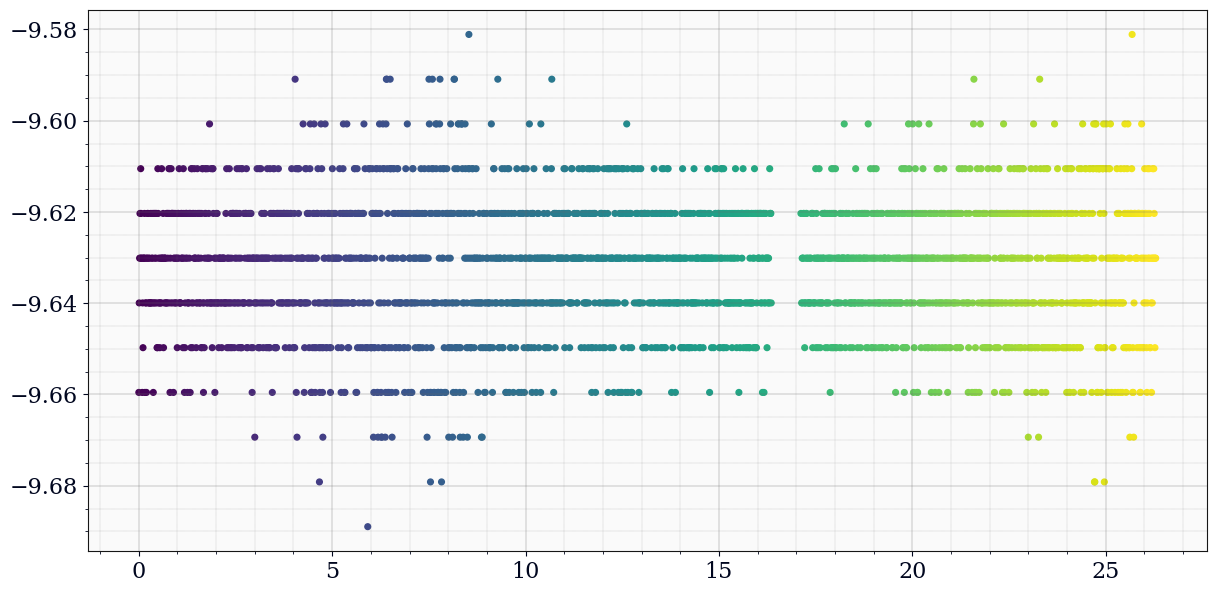

In [9]:
fig, ax = bagpy.create_fig(1)
ax[0].scatter(x='Time', y='linear_acceleration.y', data=df_msgsImu, s= 17, c = 'Time')
plt.show()

## Заглянем в цветную камеру и камеру глубины
На борту робота установлена цветная камера и камера глубины, которые осуществляли съемку в процессе записи bag файла. Доступ к данным можно получить аналогичным способом

In [10]:
sensor_msgsImage_MSG_depth = b.message_by_topic('/device_0/sensor_0/Depth_0/image/data')
sensor_msgsImage_MSG_rgb = b.message_by_topic('/device_0/sensor_1/Color_0/image/data')
sensor_msgsImage_MSG_rgb

'20230117_183740/device_0-sensor_1-Color_0-image-data.csv'

In [11]:
df_sensor_msgsImage = pd.read_csv(sensor_msgsImage_MSG_rgb)
df_sensor_msgsImage

,Time,header.seq,header.stamp.secs,header.stamp.nsecs,header.frame_id,height,width,encoding,is_bigendian,step,data
0,0.039579,6994,1673969860,210257769,1,480,640,rgb8,0,1920,b'\x8d\x8c\x93\x8d\x8c\x93\x8e\x8d\x94\x8d\x8c...
1,0.106640,6995,1673969860,276888609,1,480,640,rgb8,0,1920,b'\x8c\x8b\x90\x8c\x8b\x90\x8d\x8b\x95\x8c\x8a...
2,0.174092,6996,1673969860,343518496,1,480,640,rgb8,0,1920,b'\x8c\x8e\x96\x8c\x8e\x96\x8a\x8e\x95\x8a\x8e...
3,0.239945,6997,1673969860,410146952,1,480,640,rgb8,0,1920,b'\x8e\x8c\x96\x8d\x8b\x95\x8d\x8b\x95\x8c\x8a...
4,0.307951,6998,1673969860,476774216,1,480,640,rgb8,0,1920,b'\x8d\x8c\x93\x8d\x8c\x93\x8e\x8a\x93\x90\x8b...
...,...,...,...,...,...,...,...,...,...,...,...
389,25.994066,7383,1673969886,155333042,1,480,640,rgb8,0,1920,b'\x88\x89\x91\x87\x88\x90\x87\x85\x8f\x88\x87...
390,26.058981,7384,1673969886,221859217,1,480,640,rgb8,0,1920,b'\x86\x8b\x8f\x85\x8a\x8e\x89\x88\x8f\x89\x88...
391,26.128662,7385,1673969886,288382292,1,480,640,rgb8,0,1920,b'\x86\x8c\x8d\x86\x8c\x8d\x84\x89\x8b\x86\x8c...
392,26.192559,7386,1673969886,354902267,1,480,640,rgb8,0,1920,b'\x87\x86\x8d\x87\x86\x8d\x88\x87\x8e\x88\x87...


In [12]:
df_sensor_msgsImage_depth = pd.read_csv(sensor_msgsImage_MSG_depth)
df_sensor_msgsImage_depth

,Time,header.seq,header.stamp.secs,header.stamp.nsecs,header.frame_id,height,width,encoding,is_bigendian,step,data
0,0.033964,6991,1673969860,210136890,1,480,640,mono16,0,1280,b'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00...
1,0.101118,6992,1673969860,276767731,1,480,640,mono16,0,1280,b'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00...
2,0.167259,6993,1673969860,343397617,1,480,640,mono16,0,1280,b'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00...
3,0.234002,6994,1673969860,410026073,1,480,640,mono16,0,1280,b'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00...
4,0.300807,6995,1673969860,476653337,1,480,640,mono16,0,1280,b'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00...
...,...,...,...,...,...,...,...,...,...,...,...
389,25.986207,7380,1673969886,155212402,1,480,640,mono16,0,1280,b'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00...
390,26.053176,7381,1673969886,221738577,1,480,640,mono16,0,1280,b'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00...
391,26.119521,7382,1673969886,288261414,1,480,640,mono16,0,1280,b'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00...
392,26.186304,7383,1673969886,354781628,1,480,640,mono16,0,1280,b'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00...


Далее можно считать изображение из Pandas DataFrame, однако в таком формате его использовать неудобно, поэтому добавим немного магии для преобразования в удобный вид цветного изображения

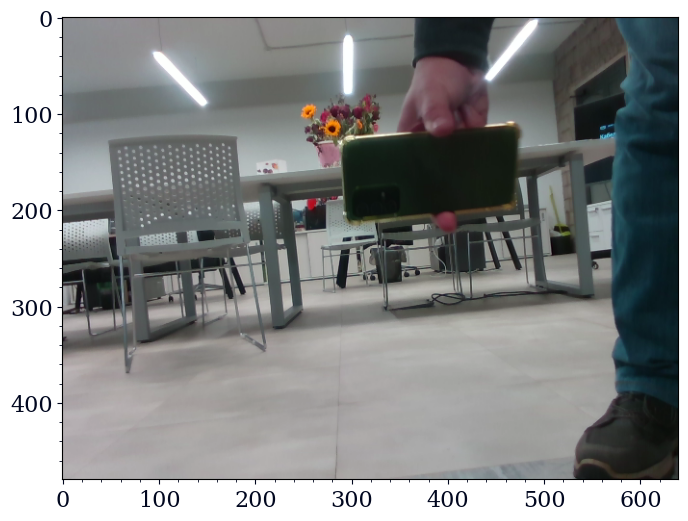

In [13]:
# size of image
H = 480
W = 640

# receive the image we are interested in from the Pandas DataFrame
raw_string = df_sensor_msgsImage['data'][190]

# convert to byte string with escape characters included
byte_string = raw_string[2:-1].encode('latin1')

# remove escaped characters
escaped_string = byte_string.decode('unicode_escape')

# convert back to byte string without escaped characters
byte_string = escaped_string.encode('latin1')

# convert string to numpy array
nparr = np.frombuffer(byte_string, np.uint8)

# convert to 3 channel rgb image array of (H x W x 3)
rgb = nparr.reshape((H, W, -1))

# show image in matplotlib
plt.imshow(rgb)

Ещё больше магии применим для преобразования изображения с карты глубины встроенной камеры Intel Realsence

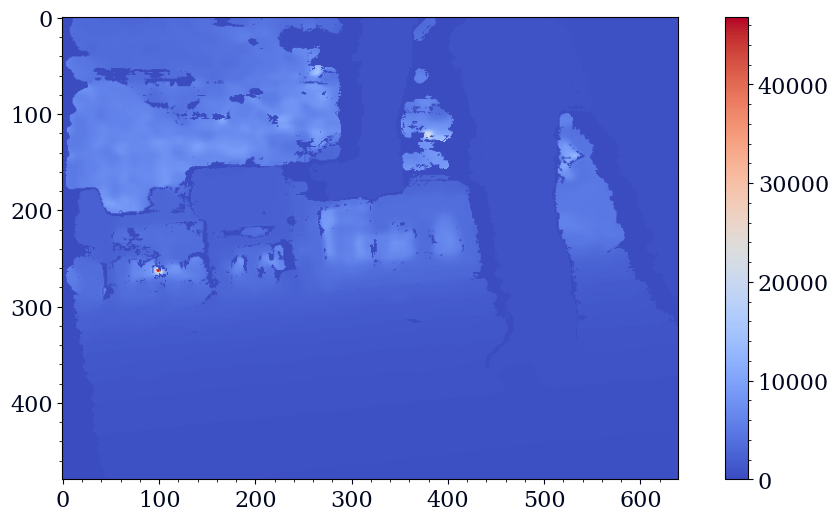

In [14]:
# size of image
H = 480
W = 640

# receive the image we are interested in from the Pandas DataFrame
raw_string = df_sensor_msgsImage_depth['data'][180]

# convert to byte string with escape characters included
byte_string = raw_string[2:-1].encode('latin1')

# remove escaped characters
escaped_string = byte_string.decode('unicode_escape')

# convert back to byte string without escaped characters
byte_string = escaped_string.encode('latin1')

# convert string to numpy array
nparr = np.frombuffer(byte_string, np.uint8)

# convert to 3 channel rgb image array of (H x W x 3)
depth_image = nparr.view(np.uint16).reshape((H, W))

# show image in matplotlib in grayscale
plt.imshow(depth_image, cmap='coolwarm')
plt.colorbar()  # Добавить цветовую шкалу, если нужно
plt.show()

## Практическое задание
* Попробуйте считать какие-либо параметры датчиков из данного файла, например, акселерометра
* Постройте параметры в виде графиков в matplotlib

Данные акселерометра:

In [15]:
df_msgsImu[['Time', 'linear_acceleration.x', 'linear_acceleration.y', 'linear_acceleration.z']].head()

,Time,linear_acceleration.x,linear_acceleration.y,linear_acceleration.z
0,0.000383,-1.108151,-9.659550,-0.107873
1,0.010330,-1.117958,-9.639936,-0.107873
2,0.020583,-1.108151,-9.630130,-0.098066
3,0.030097,-1.098345,-9.620323,-0.107873
4,0.041590,-1.088538,-9.630130,-0.117680


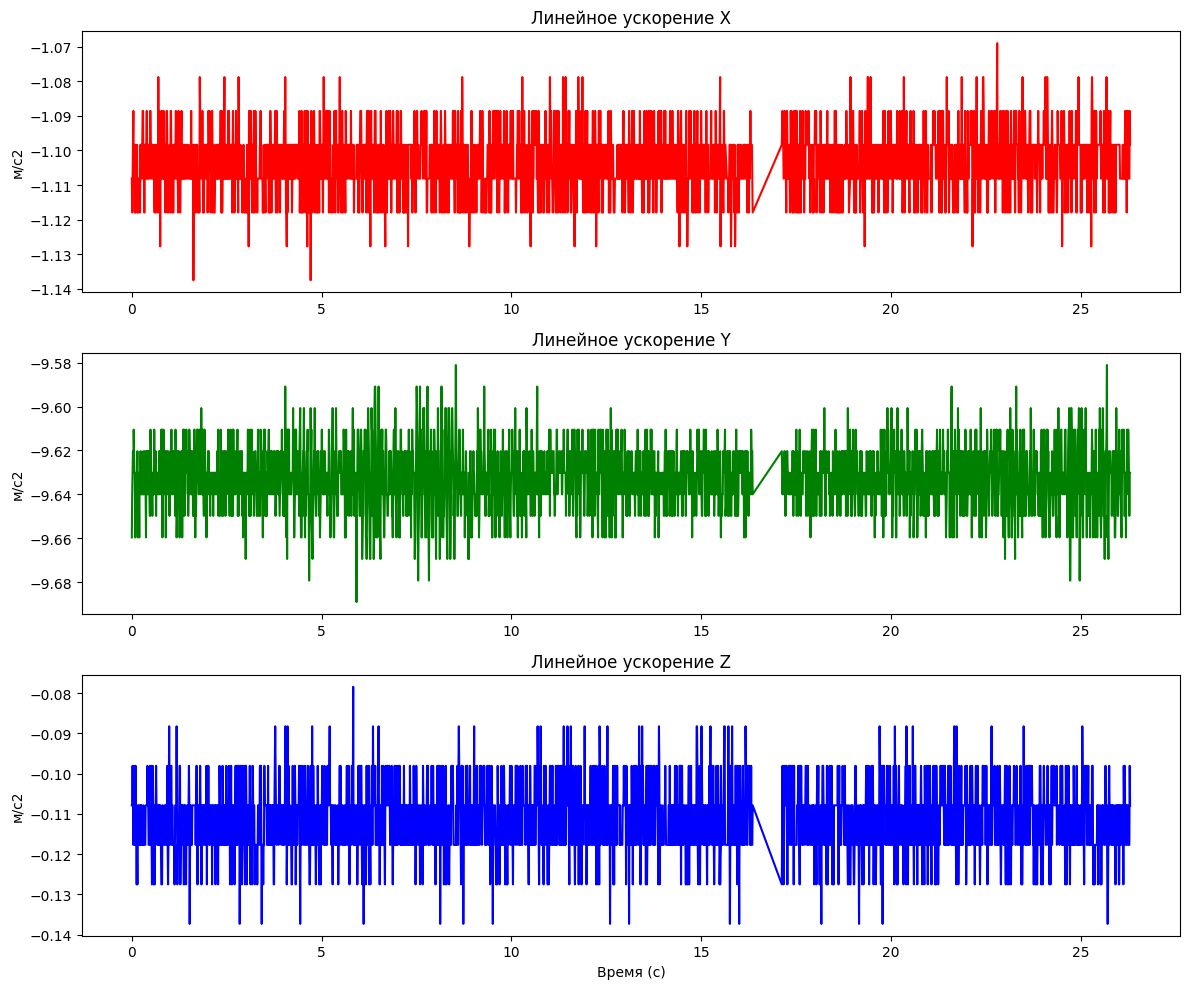

In [21]:
plt.style.use(['default'])
plt.figure(figsize=(12, 10))

plt.subplot(3, 1, 1)
plt.plot(df_msgsImu['Time'], df_msgsImu['linear_acceleration.x'], 'r')
plt.title('Линейное ускорение X')
plt.ylabel('м/с2')

plt.subplot(3, 1, 2)
plt.plot(df_msgsImu['Time'], df_msgsImu['linear_acceleration.y'], 'g')
plt.title('Линейное ускорение Y')
plt.ylabel('м/с2')

plt.subplot(3, 1, 3)
plt.plot(df_msgsImu['Time'], df_msgsImu['linear_acceleration.z'], 'b')
plt.title('Линейное ускорение Z')
plt.ylabel('м/с2')
plt.xlabel('Время (с)')

plt.tight_layout()
plt.show()

Статистика по данным акселерометра:

In [17]:
df_msgsImu[['linear_acceleration.x', 'linear_acceleration.y', 'linear_acceleration.z']].describe()

,linear_acceleration.x,linear_acceleration.y,linear_acceleration.z
count,2591.000000,2591.000000,2591.000000
mean,-1.103810,-9.632465,-0.111200
std,0.009248,0.014512,0.008819
min,-1.137571,-9.688970,-0.137293
25%,-1.108151,-9.639936,-0.117680
50%,-1.108151,-9.630130,-0.107873
75%,-1.098345,-9.620323,-0.107873
max,-1.068925,-9.581097,-0.078453


Гистограммы ускорений:

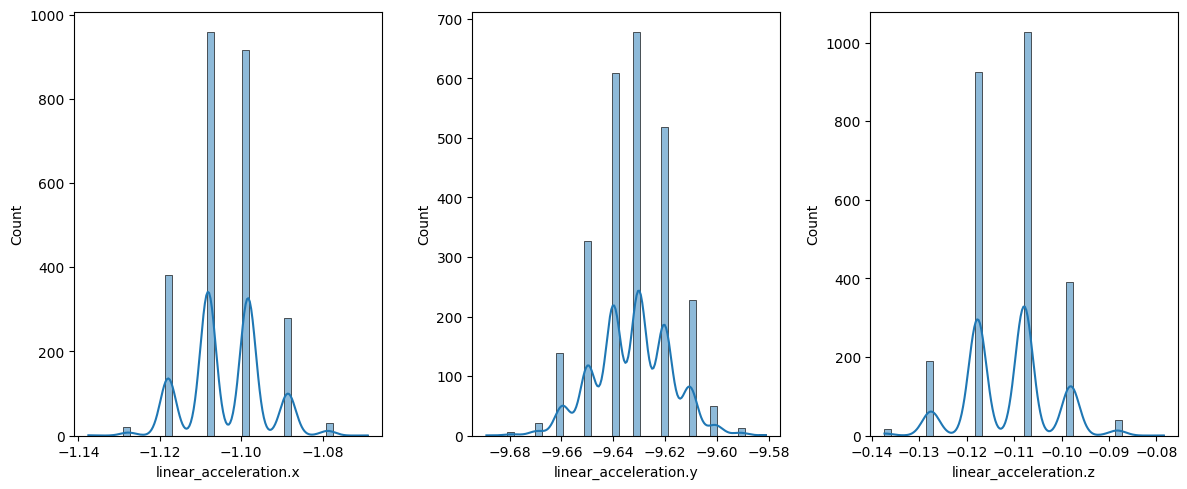

In [22]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 3, 1)
sns.histplot(df_msgsImu['linear_acceleration.x'], bins=40, kde=True)

plt.subplot(1, 3, 2)
sns.histplot(df_msgsImu['linear_acceleration.y'], bins=40, kde=True)

plt.subplot(1, 3, 3)
sns.histplot(df_msgsImu['linear_acceleration.z'], bins=40, kde=True)


plt.tight_layout()
plt.show()

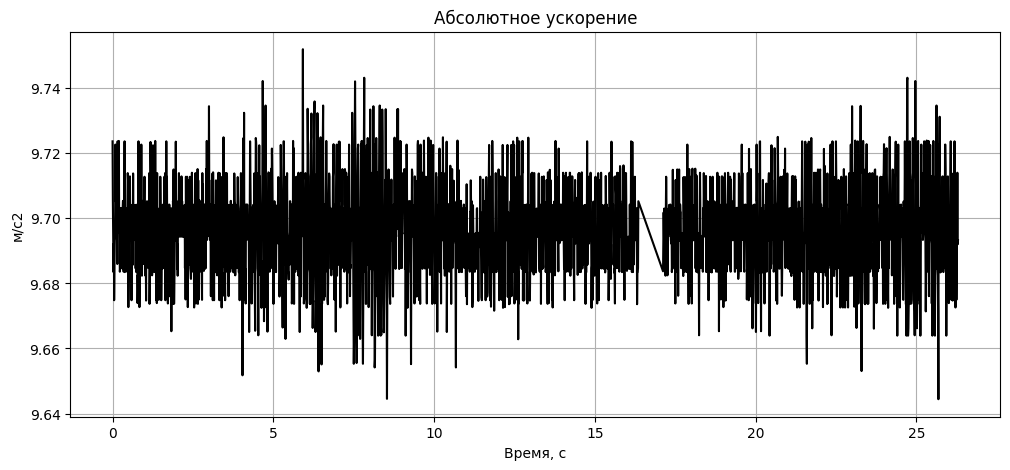

In [23]:
df_msgsImu['abs_acceleration'] = np.sqrt(df_msgsImu['linear_acceleration.x']**2 +
                                         df_msgsImu['linear_acceleration.y']**2 +
                                         df_msgsImu['linear_acceleration.z']**2)

plt.figure(figsize=(12, 5))
plt.plot(df_msgsImu['Time'], df_msgsImu['abs_acceleration'], 'k')
plt.title('Абсолютное ускорение')
plt.ylabel('м/с2')
plt.xlabel('Время, с')
plt.grid(True)
plt.show()

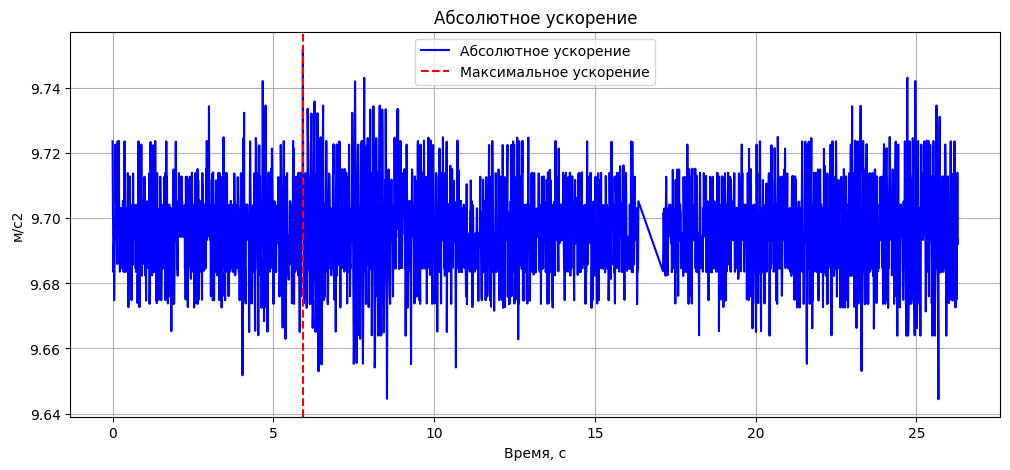

In [24]:
max_accel_idx = df_msgsImu['abs_acceleration'].idxmax()
max_accel_row = df_msgsImu.loc[max_accel_idx]

plt.figure(figsize=(12, 5))
plt.plot(df_msgsImu['Time'], df_msgsImu['abs_acceleration'], 'b', label='Абсолютное ускорение')
plt.axvline(x=max_accel_row['Time'], color='r', linestyle='--', label='Максимальное ускорение')
plt.title('Абсолютное ускорение')
plt.ylabel('м/с2')
plt.xlabel('Время, с')
plt.legend()
plt.grid(True)
plt.show()

## Дополнительная информация
Дополнительная информация по данному пакету доступна по [ссылке](https://pypi.org/project/bagpy/)